<a href="https://colab.research.google.com/github/priya1cvr/Hands-ON-ML/blob/main/5_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Decision Trees**<br><br>
Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks.<br>
Decision Trees are also the fundamental components of Random Forests <br><br>

In [ ]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(12)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#### Training and Visualizing a Decision Tree


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris= load_iris()
print(iris.feature_names)
X = iris.data[:,2:] # petal length and width 
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=12)
tree_clf.fit(X,y)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

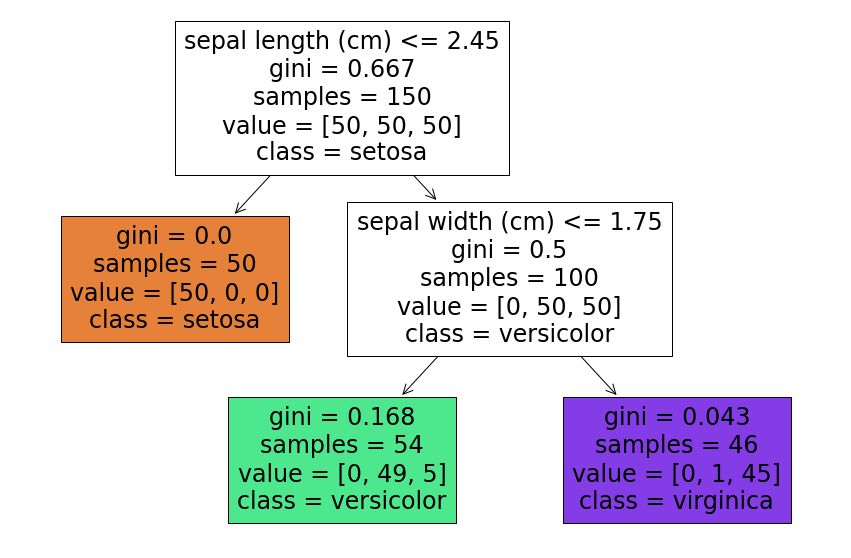

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(tree_clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

####Making Predictions

Suppose,We want to classify an iris flower 
- start at the root node (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.45 cm
- If it is, then you move down to the root’s left child node (depth 1, left). 
- In this case, it is a leaf node and the Decision Tree predicts that your flower is an Iris setosa .

Similarly, it does for any new data that it wants to predict.<br>
<font color='green'>One of the many qualities of Decision Trees is that they require very little data preparation. In fact, they don’t require feature scaling or centering at all.</font>

Each Node has 3 attribues : **samples, value and gini** <br>
- Sample attribute : Counts how many training instances it applies to .<br>
for e.g. 100 training instances have a petal length greater than 2.45 cm (depth 1, right), and of those 100, 54 have a petal width smaller than 1.75 cm (depth 2, left) <br>
- Value attribute : tells you how many training instances of each class this node applies to. <br>
for example, the bottom- right node applies to 0 Iris setosa, 1 Iris versicolor, and 45 Iris virginica
- Gini attribute : measures its impurity i.e. a node is “pure” (gini=0 ) if all training instances it applies to belong to the same class <br>
For example, since the depth-1 left node applies only to Iris setosa training instances, it is pure and its score is 0

The depth-2 left node has a gini score equal to 1 – (0/54)2 – (49/54)2 – (5/54)2 ≈ 0.168.

**Gini Impurity :**

 p(i,k) is the ratio of class k instances among the training instances in the ith node


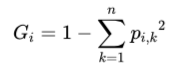




**NOTE** <br><br>
Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

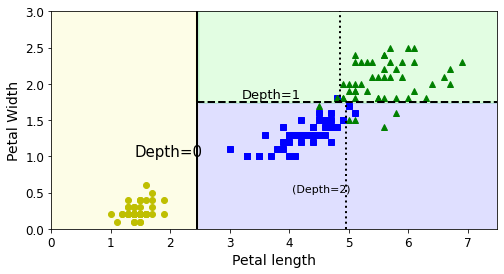

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,X,y, axes=[ 0,7.5,0,3 ], iris=True, legend=False, plot_training=True):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1,x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_map = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_map)
  if not iris:
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_map2, alpha=0.8)
  if plot_training:
    plt.plot(X[:,0][y==0], X[:,1][y==0], "yo", label="Iris-Setosa")
    plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:,0][y==2], X[:,1][y==2], "g^", label="Iris-Virginica")
  if iris:
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal Width", fontsize=14)
  else:
    plt.xlabel(r"$x_1$",fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  if legend:
    plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

**Decision Tree’s decision boundaries** <br><br>
- The thick vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm. Since the lefthand area is pure (only Iris setosa), it cannot be split any further. 
- righthand area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line). Since max_depth was set to 2, the Decision Tree stops right there. 
- If we set max_depth  to 3, then the two depth-2 nodes would each add another decision boundary (represented by the dotted lines)


**Estimating Class Probabilities** <br><br>
- A Decision Tree can also estimate the probability that an instance belongs to a particular class k
- First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node
- e.g. suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide <br>
The corresponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54), and 9.3% for Iris virginica (5/54)
- If Decision tree classifier is asked to predict the class ,it should output Iris versicolor (class 1) because it has the highest probability. 



In [ ]:
tree_clf.predict_proba([[5, 1.5]])


array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])


array([1])

#### Sensitity to Training Set Details 

In [ ]:
## Sensitivity to Training set 
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower


array([[4.8, 1.8]])

In [ ]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

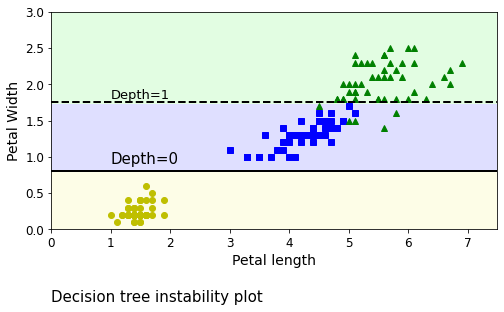

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.text(0,-1,"Decision tree instability plot",fontsize=15)
plt.show()

#### The CART Training Algorithm (Classification and Regression Tree)

- The algorithm works by **first splitting the training set into two subsets using a single feature k and a threshold tk** (e.g., “petal length ≤ 2.45 cm”)
- How does it choose k and tk? <br> -- It searches for the pair (k, tk) that produces the purest subsets (weighted by their size).
- Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively. <br> It stops recursing once it reaches the maximum depth (defined by max_depth parameter)

**NOTE** <br>
CART algorithm is a *greedy algorithm*: <br>
1. It greedily searches for an optimum split at the top level, then repeats the process at each subsequent level. <br>
2. It does not check whether or not the split will lead to the lowest possible impurity several levels down.<br> 
3. A greedy algorithm often produces a solution that’s reasonably good but not guaranteed to be optimal.
4.Unfortunately, finding the optimal tree is known to be an NP-Complete problem: it requires O(exp(m)) time



**Gini Impurity or Entropy?** <br>
By default, the Gini impurity measure is used,but one can select the *entropy* impurity measure instead by setting the criterion hyperparameter to entropy<br> 
In ML, **entropy is frequently used as an impurity measure: a set’s entropy is zero when it contains instances of only one class**
<br>
In above figure , depth-2 left node has an entropy equal to <br>
- (49/54) * log(49/54) - (5/54)*log(5/54) ~~ 0.445  ( formula as below) <br> 

**Should you use Gini impurity or entropy?** <br>
- most of the time it does not make a big difference: they lead to similar trees.
- Gini impurity is slightly faster to compute, so it is a good default.
- However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees

**Entropy is given by formula ** <br>

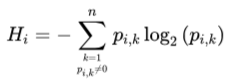


**Regularization Hyperparameters** <br>
Decision Trees make very few assumptions about the training data <br>
- If left **unconstrained**, the tree structure will adapt itself to the training data, fitting it very closely—indeed, most likely overfitting.<br> <font color='green'>
Such a model is often called a <font color='blue'>**nonparametric model** </font>, not because it does not have any parameters (it often has a lot) but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data. </font>
- In a **parametric model**, such as a linear model, has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).<br><br>

To avoid overfitting the training data
   - restrict the Decision Tree’s freedom during training , called **regularization** . <br> In general Reducing max_depth parameter 
will regularize the model and thus reduce the risk of overfitting.
<br> <br>The DecisionTree classifier class has a few other parameters that similarly restrict the shape of the Decision Tree. 
  - min_samples_split: the minimum number of sample a node must have before it can be split
  - min_samples_leaf: the minimum number of samples a leaf node must have 
  - min_weight_fraction_leaf: same as min_samples_leaf but expressed as a fraction of the total number of weighted instances
  - max_leaf_nodes: the maximum number of leaf nodes
  - max_features: the maximum number of features that are evaluated for splitting at each node <br>
**Increasing min_ * hyperparameters or reducing max_* hyperparameters will regularize the model.**

Below shows two Decision Trees trained on the moons dataset. <br>
On the left the Decision Tree is trained with the default hyperparameters (ie., no restrictions), and on the right it’s trained with min_samples_leaf=4 <br>
Left one is overfitting and Right one is generalizing better.

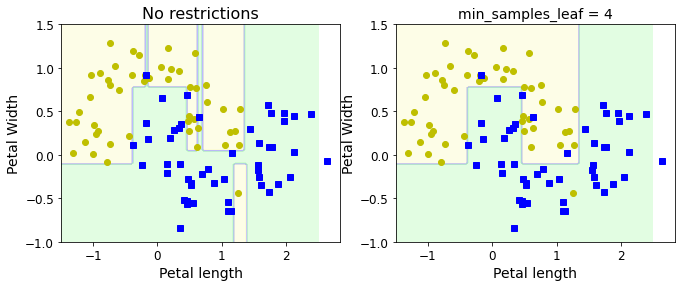

In [ ]:
from sklearn.datasets import  make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=12)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=12)
deep_tree_clf1.fit(Xm,ym)
deep_tree_clf2.fit(Xm,ym)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=True)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=True)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

[[ 0.93969262 -0.34202014]
 [ 0.34202014  0.93969262]]
(150, 2) (2, 2)


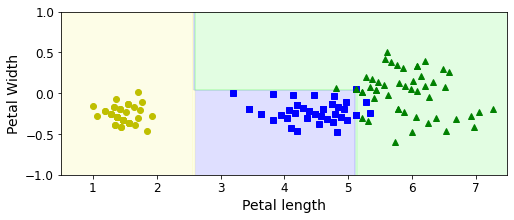

In [ ]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
print(rotation_matrix)
print(X.shape, rotation_matrix.shape)
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=True)

plt.show()


(100, 2) (100,)


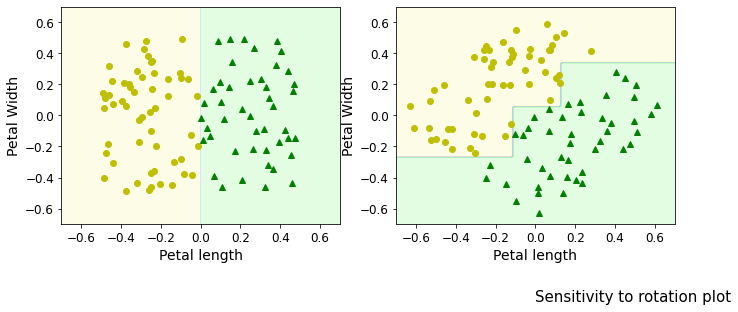

In [ ]:
## sensitivity_to_rotation_plot
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

print(Xs.shape, ys.shape)
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7])
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7])
plt.text(0,-1.2,"Sensitivity to rotation plot",fontsize=15)

plt.show()

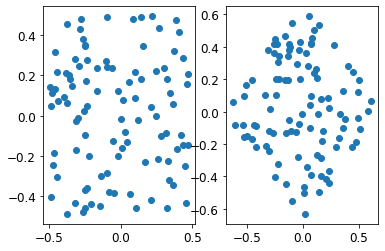

In [ ]:
## plotting above 2 data 

plt.subplot(121)
plt.scatter(Xs[:,0], Xs[:,1])
plt.subplot(122)
plt.scatter(Xsr[:,0], Xsr[:,1])


### Regression trees
Decision Trees are also capable of performing regression tasks.<br>
Lets build on noisy quadratic dataset with max_depth=2

In [ ]:
 # Quadratic training set + noise
np.random.seed(12)
m = 200
X = np.random.rand(m,1)
y = 4* (X-0.5)**2
y = y + np.random.randn(m, 1) / 10


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=12)
tree_reg.fit(X,y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=12, splitter='best')

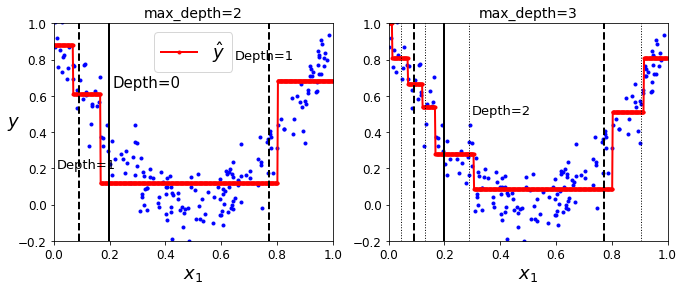

In [ ]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=12)
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=12)
tree_reg1.fit(X,y) 
tree_reg2.fit(X,y) 

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

The predicted value for each region is always the average target value of the instances in that region. <br> The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.<br>
The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE <br>

Just like for classification tasks, Decision Trees are prone to overfitting when dealing with regression tasks. <br>

**CART cost function for regression**

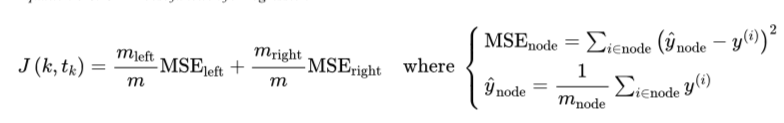

Just like for classification tasks, Decision Trees are prone to overfitting when dealing with regression tasks. <br>
Without any regularization (i.e., using the default hyperparameters), you get the predictions on the left plot below <br>
Setting min_leaf_samples =10 results in a much more reasonable model , the right plot below

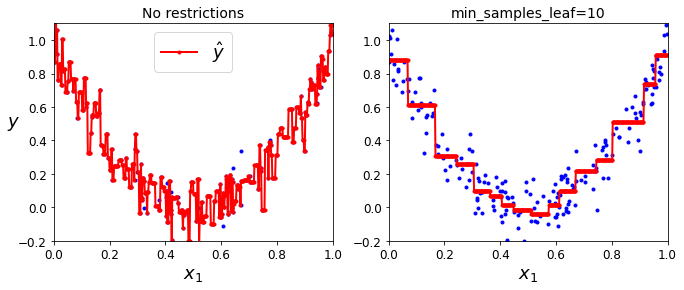

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

#### Instability

Limitations of Decision Trees: <br>
- Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation. ( Refer figure above Sensitity to Training Set rotation ) <br><br>
In that figure it shows a simple linearly separable dataset: on the left, a Decision Tree can split it easily, while on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily convoluted. <br><br>
Although both Decision Trees fit the training set perfectly, it is very likely that the model on the right will not generalize well <br><br>
 **One way to limit this problem is to use Principal Component Analysis** , which often results in a better orientation of the training data <br><font color='blue'>
 **The main issue with Decision Trees is that they are very sensitive to small variations in the training data** </font>
 for e.g remove the widest Iris versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new Decision Tree, you may get the model represented as shown above in Decision tree instability plot <br><br>
 **Random Forests can limit this instability by averaging predictions over many trees,**

#### CART algorithm (Detailed ) 
- Each node is split so that the Gini impurity of the children (more specifically the average of the Gini of the children weighted by their size) is minimized.
- The recursion stops when the maximum depth, a hyperparameter, is reached, or when no split can lead to two children purer than their parent.
- For example if a node contains five samples, with two of class   1, two of class   2, one of class   3 and none of class   4, then

G  = 1 - { (2/5)$^2$ - (2/5)$^2$ - (1/5)$^2$ }  =0.64  ,Gini of Parent  <br> 

If X = [[1.5], [1.7], [2.3], [2.7], [2.7]]  and <br>   y = [1, 1, 2, 2, 3] <br> then an optimal split is feature_0 < 2, because as computed above the Gini of the parent is 0.64, and the Gini of the children after the split is <br> 
G = (2/5)*G_left + (3/5)*G_right <br>
  = (2/5)*0  + (3/5) * [ 1 - { (2/3)$^2$ - (1/3)$^2$ } ] = 0.27

After this we can see that   no other split yields a lower Gini.


**Finding the optimal feature and threshold**<br><br>
We can all possible splits and compute the resulting Gini impurities. <br>
But **how can we try all possible thresholds for a continuous values?** <br>
There is a simple trick — sort the values for a given feature, and consider all midpoints between two adjacent values. Sorting is costly, but it is needed.

Secondly, **how might we compute the Gini of all possible splits?**<br>
A faster approach is <br>
1. iterate through the sorted feature values as possible thresholds, 
2. keep track of the number of samples per class on the left and on the right,  
3. increment/decrement them by 1 after each threshold. From them we can easily compute Gini in constant time.

if m is the size of the node and m[k] the number of samples of class k in the node, then

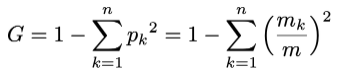

and since after seeing the i-th threshold there are i elements on the left and m–i on the right,

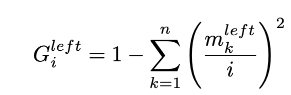

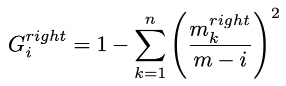

 **The resulting Gini is a simple weighted average:**

 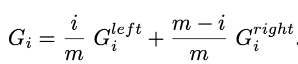


In [ ]:
import pandas as pd 
wifi_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt',delimiter="\t",header=None)
print(wifi_df.shape)
wifi_df.head()

(2000, 8)


,0,1,2,3,4,5,6,7
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [ ]:
data = wifi_df.to_numpy()
X = data[: , :-1] # all columns but the last
y = data[: , -1] -1  # expected to be from 0 to n_classes - 1

## Fit the data 
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X,y)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
input = [-70, 0, 0, 0, -40, 0, 0]
pred = clf.predict([input])[0]
print("Input: {}".format(input))
print("Prediction: " ,pred)

Input: [-70, 0, 0, 0, -40, 0, 0]
Prediction:  3


In [ ]:
print(clf.n_classes_)

from sklearn import tree 
text_representation = tree.export_text(clf)
print(text_representation)

4
|--- feature_0 <= -54.50
|   |--- feature_4 <= -59.50
|   |   |--- class: 0
|   |--- feature_4 >  -59.50
|   |   |--- class: 3
|--- feature_0 >  -54.50
|   |--- feature_0 <= -44.50
|   |   |--- class: 2
|   |--- feature_0 >  -44.50
|   |   |--- class: 1



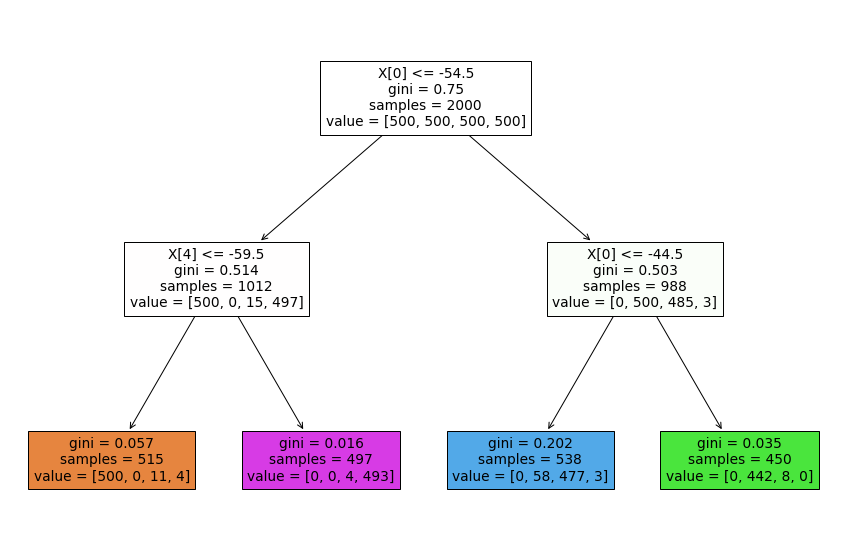

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   filled=True)

**Q1: Train and fine-tune a Decision Tree for the moons dataset by following these steps** <br>
1. Use to generate a moons dataset, samples = 10000, noise=0.4.
2. Use train_test_split to split the dataset into a training set and a test set.
3. Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.
4. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

In [ ]:
from sklearn.datasets import  make_moons
from sklearn.model_selection import train_test_split,GridSearchCV

Xm, ym = make_moons(n_samples=10000, noise=0.4, random_state=5)
X_train,X_test,y_train,y_test = train_test_split(Xm,ym,test_size=0.2)
tree_param = {'criterion':['gini','entropy'],'max_leaf_nodes':[2,3,4,5,6,10,20,30,40], 'min_samples_split': [2, 3, 4] }
moon_clf = GridSearchCV(DecisionTreeClassifier(random_state=5),tree_param, cv=5,n_jobs=-1, verbose=1)
moon_clf.fit(X_train,y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=5, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 10, 20, 30,

In [ ]:
moon_clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = moon_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8595

The accuracy above is nearly 86 % , which was the expectation 

**Q2: Grow a forest by following these steps**<br>
1. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint use sklearn ShuffleSplit class <br>
2. Train one Decision Tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy <br>
3. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s function for this). This approach gives you majority-vote predictions over the test set.
4. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher)

In [ ]:
from sklearn.model_selection import ShuffleSplit
# Continuing the previous exercise, generate 1,000 subsets of the training set, 
# each containing 100 instances selected randomly. 

splits = ShuffleSplit(n_splits=1000, test_size=len(X_train) - 100 , random_state=5)

small_sets= []
for train_index, test_index in splits.split(X_train):
  X_train_small = X_train[train_index]
  y_train_small = y_train[train_index]
  small_sets.append((X_train_small,y_train_small))


In [ ]:
#2. Train one Decision Tree on each subset,
from sklearn.base import clone 
forest = [clone(moon_clf.best_estimator_) for i in range(1000)]

accuracy_scores = []
for tree,( X_train_small,y_train_small) in zip(forest,small_sets):
  tree.fit(X_train_small,y_train_small)

  y_pred = tree.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test,y_pred))

print("Mean Accuracy scores:", np.mean(accuracy_scores))

Mean Accuracy scores: 0.7848494999999999


In [ ]:
# 3.For each test set instance, generate the predictions of the 1,000 Decision Trees

Y_pred = np.empty([1000, len(X_test)], dtype=np.uint8)
# np.empty, unlike np.zeros, does not set the array values to zero, and may therefore be marginally faster
# generates data like : [  0,   0,  99, ..., 255, 255, 255]
#[157,   0,  71, ..., 255, 142,   2] .... 

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)


In [ ]:
Y_pred

array([[0, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 0]], dtype=uint8)

In [ ]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [ ]:
#. 4. Evaluate these predictions on the test set:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))


0.8615